# Linear Algebra Refresher

In this notebook we will review some basic notions and techniques in linear algebra.

In [1]:
## Written in Python 3.7
import numpy as np
import math
from matplotlib import pyplot as plt

## Outline
* Matrix algebra
* Solving linear equations

\* Some of the illustrations come from Wikipedia

## Matrix algebra

A matrix is a rectangular array of objects:
$$
    \mathbf{A}=\left(\begin{array}{c c c}
    a_{11} & a_{12} & a_{13}\\
    a_{21} & a_{22} & a_{23}
    \end{array}\right)_{2\times 3}
$$

$a_{ij}$ can be numbers, expressions, symbols, and can also be matrices as well. (\#Rows X \#Columns) is the dimension of a matrix

**Summation.** Only matrices of the same dimension can be summed:

$$
    \left(\begin{array}{c c c}
    a_{11} & a_{12} & a_{13}\\
    a_{21} & a_{22} & a_{23}
    \end{array}\right)+\left(\begin{array}{c c c}
    b_{11} & b_{12} & b_{13}\\
    b_{21} & b_{22} & b_{23}
    \end{array}\right)=\left(\begin{array}{c c c}
    a_{11}+b_{11} & a_{12}+b_{12} & a_{13}+b_{13}\\
    a_{21}+b_{21} & a_{22}+b_{22} & a_{23}+b_{23}
    \end{array}\right)
$$

**Multiplication with a scalar.**

$$
    k\left(\begin{array}{c c c}
    a_{11} & a_{12} & a_{13}\\
    a_{21} & a_{22} & a_{23}
    \end{array}\right)
    =
    \left(\begin{array}{c c c}
    ka_{11} & ka_{12} & ka_{13}\\
    ka_{21} & ka_{22} & ka_{23}
    \end{array}\right)
$$

**Multiplication between matrices.** We can only do multiplication with $\mathbf{A}_{m\times n}$ on the left and $\mathbf{B}_{n\times k}$ on the right. Notice that the number of columns of the left matrix must equal the number of rows of the right matrix. This odd requirement comes from the definition of matrix multiplication. Suppose $\mathbf{A}_{m\times n}\mathbf{B}_{n\times k}=\mathbf{C}$, then each element of $\mathbf{C}$ is defined as:
$$
c_{ij} = \sum_{k}a_{ik}b_{kj}
$$
In other words, to calculate $c_{ij}$, you grab the $i$-th *row* of $\mathbf{A}$, and the $j$-th *column* of $\mathbf{B}$, then multiply them element-wise and sum up the products. Thus it is only valid when the row and the column you grabbed have the same number of elements. *In general, you cannot exchange the order of multiplication even if the dimension is not a problem.* i.e., even if $\mathbf{A}$ and $\mathbf{B}$ are both $m\times m$ dimensional, $\mathbf{A}\mathbf{B}\neq\mathbf{B}\mathbf{A}$, except under some special conditions.

**Transpose.** The transpose of a matrix is an operation which flips a matrix over its diagonal. It is often written as $A^\top$

![alt text](Matrix_transpose.gif)

You can prove easily that the following relationship holds:
$$
(\mathbf{A}_1\mathbf{A}_2\cdots\mathbf{A}_N)^\top = \mathbf{A}_N^\top\cdots\mathbf{A}_2^\top \mathbf{A}_1^\top
$$

### Examples and some special matrices

**1. Rotation in a plane.**
In a 2-D plane, there is a special matrix enabling you to do rotation of a point with respect to the origin of the coordinate. 
$$
\mathbf{A}=\left(
\begin{array}{c c}
\cos\theta & -\sin \theta\\
\sin\theta & \cos\theta
\end{array}\right)
$$
Let's find out what is $\mathbf{A}^2$:
$$
\left(
\begin{array}{c c}
\cos\theta & -\sin \theta\\
\sin\theta & \cos\theta
\end{array}\right)\left(
\begin{array}{c c}
\cos\theta & -\sin \theta\\
\sin\theta & \cos\theta
\end{array}\right)
=\left(
\begin{array}{c c}
\cos^2\theta-\sin^2\theta & -2\sin \theta\cos\theta\\
2\sin\theta\cos\theta & \cos^2\theta-\sin^2\theta
\end{array}\right)
=\left(
\begin{array}{c c}
\cos2\theta & \sin 2\theta\\
\sin2\theta & \cos2\theta
\end{array}\right)
$$
Miraculously, the result is simply changing $\theta$ to $2\theta$, while retaining the same form. You can prove that $\mathbf{A}^n$ will be exactly the same except for changing $\theta$ to $n\theta$

To see what it does to an arbitrary vector, let's show a numeric example below. Now I pick $\theta=\pi/6$ (i.e. 30 degrees), and I choose an arbitrary vector $\mathbf{x}=(1,0)^T$. Multiplying once,twice,... we get:

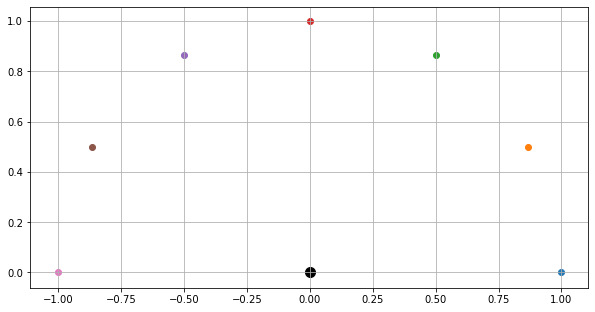

In [2]:
## showing the result of x and Ax
pi = math.pi
theta = pi/6
A = np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta),math.cos(theta)]])
x = np.transpose(np.array([1,0]))


plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect(1.0)

for i in range(7):
    y = np.dot(np.linalg.matrix_power(A,i),x)
    plt.scatter(y[0],y[1])

plt.scatter(0,0,c='black',s=100)
plt.grid(b=True)

You can see that every time $\mathbf{A}$ is multiplied to the left of a column vector, that vector will be rotated counter-clockwise for 30 degrees!

**2. Diagonal matrix.** A diagonal matrix is a *square* matrix where all the non-zero elements are only found on the diagonal entries (i.e. $a_{ij}=0$ if $i\neq j$).
$$
    \mathbf{D}=\left(\begin{array}{c c c}
    a_{11} & 0 & 0\\
    0 & a_{22} & 0\\
    0 & 0 & a_{33}
    \end{array}\right)
$$

Further, raising a diagonal matrix to the $n$-th power is trivial:
$$
    \mathbf{D}^n=\left(\begin{array}{c c c}
    a_{11}^n & 0 & 0\\
    0 & a_{22}^n & 0\\
    0 & 0 & a_{33}^n
    \end{array}\right)
$$

Multiplication among diagonal matrices is exchangeable: $\mathbf{D}_1\mathbf{D}_2=\mathbf{D}_2\mathbf{D}_1$. When the diagonal elements are all 1, such matrix is called the identity matrix:
$$
    \mathbf{I}=\left(\begin{array}{c c c}
    1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 1
    \end{array}\right)
$$
Multiplication with an identity matrix does not change the original matrix: $\mathbf{A}\mathbf{I}=\mathbf{A}$. $\mathbf{I}\mathbf{B}=\mathbf{B}$

Like the definition of the inverse of a number, if the product of two square matrices is the identity matrix, then we say they are inverse to each other. Just as 0 doesn't have its inverse, not every matrix is inversable. Firstly it has to be a square matrix (by definition), then it has to satisfy another rule which we will discuss in the context below.

**3.Matrix exponents.** Take an exponential function $y=e^x$ and substitute $x$ with a matrix, what does that mean? It is left undefined so we first have to define what it actually computes. Remember in the calculus refresher that we have a Taylor series expansion for every function near an origin. That is also true for the exponential function. Moreover, the Taylor series for the exponential function is convergent everywhere, so it behaves nicely:
$$
e^x=1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+\cdots
$$

Suppose we "formally" plugin a matrix to the expansion. In the most trivial case, we choose a diagonal matrix:
$$
e^\mathbf{D}=\mathbf{D}^0+\mathbf{D}^1+\frac{\mathbf{D}^2}{2!}+\frac{\mathbf{D}^3}{3!}+\cdots
$$

Since we already know what $\mathbf{D}^n$ looks like, we can simply take the summation elementwise:
$$
e^\mathbf{D} = \mathbf{I}+\left(\begin{array}{c c c}
    a_{11} & 0 & 0\\
    0 & a_{22} & 0\\
    0 & 0 & a_{33}
    \end{array}\right)
    +\frac{1}{2}\left(\begin{array}{c c c}
    a_{11}^2 & 0 & 0\\
    0 & a_{22}^2 & 0\\
    0 & 0 & a_{33}^2
    \end{array}\right)+\cdots
    =\left(\begin{array}{c c c}
    1+a_{11}+\frac{a_{11}^2}{2!}+\cdots & 0 & 0\\
    0 & 1+a_{22}+\frac{a_{22}^2}{2!}+\cdots & 0\\
    0 & 0 & 1+a_{33}+\frac{a_{33}^2}{2!}+\cdots
    \end{array}\right)
    =\left(\begin{array}{c c c}
    e^{a_{11}} & 0 & 0\\
    0 & e^{a_{22}} & 0\\
    0 & 0 & e^{a_{33}}
    \end{array}\right)
$$

So where the matrix is diagonal, its exponent can be evaluated element-wise. **However!! It does not hold for arbitrary matrices, and you cannot evaluate them element-by-element in the general case.** 

**4. Symmetric matrix and quadratic form.** Let's make another connection to Taylor series in calculus. First, let's say that any second-order-only algebraic expression, such as $x_1^2+x_2^2+3x_1x_2$, or $x_1x_3+x_3^2-3x_1x_2$, can be written compactly using the matrix representation:

$$
\mathbf{x}^\top \mathbf{A}\mathbf{x}
$$

Here, the matrix $\mathbf{A}$ is always taken to be symmetric (there is no inherant reason why it should be symmetric, but making it symmetric significantly eases computation and the related theory looks more elegant). For instance:

$$
(x+2y+3z)^2 = \left(\begin{array}{c}x\\
y\\
z\end{array}\right)^\top\left(\begin{array}{c c c}
1 & 2 & 3 \\
2 & 4 & 6 \\
3 & 6 & 9 
\end{array}\right)\left(\begin{array}{c}x\\
y\\
z\end{array}\right)
$$

For a bivariate function $f(x,y)$ that is at least twice differentiable at some point $(x_0,y_0)$, we already showed previously that it can be expanded into the following Taylor series:

$$
\begin{align}
f(x,y)=&f(x_0,y_0)\\
&+\frac{\partial f}{\partial x}(x_0,y_0)(x-x_0)+\frac{\partial f}{\partial y}(x_0,y_0)(y-y_0)\\
&+\frac{1}{2}\frac{\partial^2 f}{\partial x^2}(x_0,y_0)(x-x_0)^2+\frac{1}{2}\frac{\partial ^2 f}{\partial y^2}(x_0,y_0)(y-y_0)^2+\frac{\partial ^2f}{\partial x\partial y}(x_0,y_0)(x-x_0)(y-y_0)\\
&+\cdots
\end{align}
$$

Now the second derivative terms look a lot like when we expand $(a+b)^2=a^2+b^2+2ab$. (i.e. the cross-term has a coefficient 2). In fact, it can be analogously written as the following quadratic form:

$$
\begin{align}
\frac{\partial^2 f}{\partial x^2}(x_0,y_0)(x-x_0)^2+\frac{\partial ^2 f}{\partial y^2}(x_0,y_0)(y-y_0)^2+2\frac{\partial ^2f}{\partial x\partial y}(x_0,y_0)(x-x_0)(y-y_0)=
\left(\begin{array}{c}
x-x_0\\
y-y_0
\end{array}\right)^\top
\left(\begin{array}{c c}
\frac{\partial^2 f}{\partial x^2}(x_0,y_0) & \frac{\partial ^2f}{\partial x\partial y}(x_0,y_0)\\
\frac{\partial ^2f}{\partial x\partial y}(x_0,y_0) & \frac{\partial ^2 f}{\partial y^2}(x_0,y_0)
\end{array}\right)
\left(\begin{array}{c}
x-x_0\\
y-y_0
\end{array}\right)
\end{align}
$$

And we usually call this symmetric matrix $\left(\begin{array}{c c}
\frac{\partial^2 f}{\partial x^2}(x_0,y_0) & \frac{\partial ^2f}{\partial x\partial y}(x_0,y_0)\\
\frac{\partial ^2f}{\partial x\partial y}(x_0,y_0) & \frac{\partial ^2 f}{\partial y^2}(x_0,y_0)
\end{array}\right)$ the Hessian matrix ($\mathbf{H}$) of a function at point $(x_0,y_0)$. If we also write the gradient of the function at that point as $\mathbf{J}=(\frac{\partial f}{\partial x}(x_0,y_0),\frac{\partial f}{\partial y}(x_0,y_0))$

The Taylor-expansion of a multivariate function around a certain point $\mathbf{x}_0$ is

$$
f(\mathbf{x}) = f(\mathbf{x}_0)+\mathbf{J}(\mathbf{x}-\mathbf{x}_0)+\frac{1}{2}(\mathbf{x}-\mathbf{x}_0)^\top\mathbf{H}(\mathbf{x}-\mathbf{x}_0)+\cdots
$$

If $(x_0,y_0)$ is the local maximum/minimum or the saddle point of $f$, we know that $\mathbf{J}$ becomes zero since it contains the first derivative, then the behavior of $f$ totally depends on $\mathbf{H}$ near the vicinity of $(x_0,y_0)$. That's exactly true for whatever number of variables you have for the function.

## Solving linear equations

**Linear space.** What is a linear space? An example of a linear space is our 3D world. The basic elements in this world are vectors. Once we set up a coordinate system, such as the Cartesian coordinate, we will be able to represent a vector as a row-only or a column-only matrix, also called row-vector or column-vector. Each element is the coordinate value in that dimension. The origin, for instance, has a coordinate value $(0,0,0)$. So it is a row vector, alternatively we can also write it as $(0,0,0)^\top$, thus representing as a column vector. Usually we tend to work with column vectors more! 

The basic matrix algebra works the same on vectors, since they are just a special kind of matrices equipped with a geometric meaning. Suppose we are working with the most familiar 3D Euclidean space, $\mathbb{R}^3$. Let's take an element $\mathbf{x}$-- a column vector from $\mathbb{R}^3$. What if we multiply a square matrix $\mathbf{A}$ to the left of $\mathbf{x}$? We find that we have another column vector $\mathbf{y}=\mathbf{A}\mathbf{x}$ which also belongs to the same linear space $\mathbb{R}^3$. Thus we have successfully transformed a vector $\mathbf{x}$ to another within the same space by matrix multiplication. We define such transformation as a linear transform (in the broader sense, when the resulting vector belongs to another linear space, we can call it a linear map). What's the most simple linear transformation? We know the linear function $y=kx$ in middle school. This is the most simple linear transform on the real line. There are many important applications of linear transform. In statistical analysis of many variables $\mathbf{x}$, their values may be highly correlated, and the number of variables is too large to visualize altogether, and we are only interested in the combination of their behavior as a whole. We can then find a linear transform $\mathbf{y}=\mathbf{A}\mathbf{x}$, such that most of the variation in $\mathbf{x}$ is captured by the first few components of $\mathbf{y}$, and the rest can be discarded in visualization. It is called principle component analysis, and is highly applicable in problems such as DNA sequence analysis, expression data visualization, morphological classification etc.

OK, now we know $\mathbf{y}=\mathbf{A}\mathbf{x}$ defines a linear transform, what if we know only the result $\mathbf{y}$ and matrix $\mathbf{A}$, but not the original vector $\mathbf{x}$? This defines a problem that is also familiar to us --- solving systems of linear equations. And now we tend to write the problem as $\mathbf{A}\mathbf{x}=\mathbf{y}$. When the vectors are three dimensional, we know from high school that we also need exactly three independent constraints to generate a unique solution of $\mathbf{x}$. Too few constraints generate infinite number of solutions, and too many constraints give no solution. This information is all coded within the structure of $\mathbf{A}$. 

In the following text we assume $\mathbf{A}$ is a 3X3 square matrix:
$$
\left(\begin{array}{c c c}
    a & b & c\\
    d & e & f\\
    g & h & i
    \end{array}\right).
$$
The actual algebraic equations look like:
$$
\left\{\begin{array}{l}
    ax_1+bx_2+cx_3=y_1\quad(1)\\
    dx_1+ex_2+fx_3=y_2\quad(2)\\
    gx_1+hx_2+ix_3=y_3\quad(3)
    \end{array}\right.
$$
We know that the necessary and sufficient condition for a unique solution to this system requires that the coefficients in (1),(2),(3) can not be derived from each other. For instance, if $g=a+d, h=b+e, i=f+c$, then the third equation has effectively no new information in terms of the coefficients, and this is something we don't like if we want a unique solution. In other words, these three row vectors (the coefficients of each equation): $r1=(a,b,c),r2=(d,e,f),r3=(g,h,i)$ do not fall on to the same plane in the three dimensional space! (if, however, that $r1=\alpha r2+\beta r3$, you can easily see that $r1$ lies on the plane defined by $r2$ and $r3$). How do we know whether they are on the same plane or not? We can look at the volume of the geometric object that is spanned by these vectors, such as this parallelepiped:

![alt text](3dDet.png)

If these three vectors fall onto the same plane, then the parallelepiped will be compressed to a thin paper and has 0 volume. The volume of the parallelepiped spanned by all the row vectors of the square matrix $\mathbf{A}$, is defined as the determinant $|\mathbf{A}|$ of the square matrix $\mathbf{A}$, up to a sign-difference. (Well, it is actually not the usual definition of determinant, but probably the most intuitive one. Please do notice that the volume cannot be negative, but the determinant can be negative depending on where the vectors are pointing, however they have the same absolute value). Now we immediately know the necessary and sufficient condition for the unique solution of the above problem, and yes we only need the determinant $\mathbf{A}$ to be non-zero!

This is also the necessary and sufficient condition for $\mathbf{A}$ to be inversible. Indeed, once $|\mathbf{A}|\neq 0$, we can find $\mathbf{A}^{-1}$ and multiply to both side to get the solution $\mathbf{x}=\mathbf{A}^{-1}\mathbf{y}$. It is really analogous to the solution of $kx=y$. If $k\neq 0$, then there exists $k^{-1}$ and $x=k^{-1}y$.

If both $\mathbf{A}$ and $\mathbf{B}$ are square matrices of the same dimension, the following relationship of their determinants holds:
$$
|\mathbf{A}\mathbf{B}|=|\mathbf{A}||\mathbf{B}|=|\mathbf{B}||\mathbf{A}|=|\mathbf{B}\mathbf{A}|
$$

Transposing a matrix does not change its determinant: $|\mathbf{A}^\top|=|\mathbf{A}|$

The inverse of a matrix also has the inverse of the original determinant: $|\mathbf{A}^{-1}|=|\mathbf{A}|^{-1}$

### Example of calculating the determinant of a square matrix

Of course, we don't measure the "volume" of that parallelepiped to calculate the determinant, there is a simple recursive relation for an arbitrary matrix of size $n\times n$. Using $n=3$ as an example:

$$
    \left|\begin{array}{c c c}
    a_{11} & a_{12} & a_{13}\\
    a_{21} & a_{22} & a_{23}\\
    a_{31} & a_{32} & a_{33}
    \end{array}\right| = a_{11}\left|\begin{array}{c c}a_{22} & a_{23}\\
    a_{32} & a_{33}
    \end{array}\right|
    -a_{12}\left|\begin{array}{c c}a_{21} & a_{23}\\
    a_{31} & a_{33}
    \end{array}\right|
    +a_{13}\left|\begin{array}{c c}a_{21} & a_{22}\\
    a_{31} & a_{32}
    \end{array}\right|
$$

where the 2-by-2 determinant is defined as

$$
\left|\begin{array}{c c}a & b\\
    c & d
    \end{array}\right|=ad-bc
$$

The exact formula for an $n$-by-$n$ determinant $|\mathbf{A}|$, when the recursion is done on an arbitrary row $i$, is

$$
|\mathbf{A}| = \sum_{j=1}^n(-1)^{i+j}a_{ij}|\mathbf{A}'_{i,j}|
$$

where $\mathbf{A}'_{i,j}$ is the sub-matrix that is produced by removing the $i$-th row and the $j$-th column of the original matrix $\mathbf{A}$. In this way the recursion goes all the way back until there are all 2-by-2 determinants left in the formula.

**Exercise.** Try calculating this determinant by the above recursion

$$
\left|\begin{array}{c c c c}
0 & 2017 & 0 & 0\\
1 & 2018 & 0 & 0\\
2 & 2019 & 2 & 0\\
3 & 2020 & 3 & 3
\end{array}\right|
$$

**Solution.** Look for rows or columns that have most zeros. In this case:

$$
\left|\begin{array}{c c c c}
0 & 2017 & 0 & 0\\
1 & 2018 & 0 & 0\\
2 & 2019 & 2 & 0\\
3 & 2020 & 3 & 3
\end{array}\right|
=(-1)^{1+2}\times2017
\left|\begin{array}{c c c}
1 &  0 & 0\\
2 &  2 & 0\\
3 &  3 & 3
\end{array}\right|
=-2017\times (-1)^{1+1}\times 1 \left|\begin{array}{c c c}
2 & 0\\
3 & 3
\end{array}\right|
=-2017\times(2\times 3-3\times 0)=-2017\times 6
$$

We also discover a property here that for any matrix where either the upper-half triangular part ($j>i$) or the lower-half triangular part ($i>j$) are all zeros, its determinant is simply the product of those elements on the diagonal lines: $\prod_i a_{ii}$ 

## Iterating the linear transform, and the eigensystem

In some problems we need to consider multiple times of the same linear transform $\mathbf{A}$. Such problems arise naturally in many forward-time systems, such as populations migrating among their habitats for multiple generations, or the statistical properties of a group of cells undergoing differentiation after many mitosis, or tracking a genetic allele backward in time through ancestors. $\mathbf{x}$ usually depicts the status of the system, such as the population density, metabolic/development stage etc. In these problems, we often need to know what happens when $\mathbf{y}=\mathbf{A}^n\mathbf{x}$, especially when $n$ is large. Here $n$ refers to the time component of the system, and is discretized such that we can use matrix multiplication. $\mathbf{y}$ is the eventual state of the system after $n$ iterations.

Abstractly speaking, every time we transform by multiplying an additional $\mathbf{A}$, we change the vector into another position in the linear space. It will be of great interest to know how $\mathbf{A}$ acts on $\mathbf{x}$ geometically. 

Let's do a demonstration below,where we use two different matrices as the linear transform, and try them for ten iterations on several different starting points in the 2D plane.

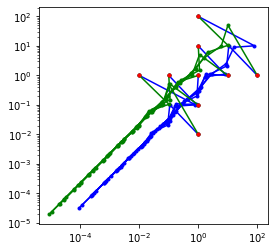

In [3]:
X0 = np.transpose(np.array([[0.01,1.0],[0.1,1.0],[1.0,1.0],[10.0,1.0],[100.0,1.0],[1.0,10.0],[1.0,0.1],[1.0,0.01],[1.0,100.0]]))
A = np.array([[0.1,0.8],[0.1,0.1]])
B = np.array([[0.1,0.1],[0.5,0.1]])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.yscale("log")
plt.xscale("log")

for i in range(np.shape(X0)[1]):
    x0 = X0[:,i]
    y0 = []
    y1 = []
    
    for n in range(0,10):
        y = np.dot(np.linalg.matrix_power(A,n),x0)
        y0.append(y[0])
        y1.append(y[1])
    ax.plot(y0,y1,'b.-')
    ax.plot(y0[0],y1[0],'r.')
        
for i in range(np.shape(X0)[1]):
    x0 = X0[:,i]
    y0 = []
    y1 = []

    for n in range(0,10):
        y = np.dot(np.linalg.matrix_power(B,n),x0)
        y0.append(y[0])
        y1.append(y[1])
    ax.plot(y0,y1,'g.-')
    ax.plot(y0[0],y1[0],'r.')



What you saw here is that for a fixed linear transform, regardless of the initial position of the points, they all converge along a common direction after multiple iterations. This direction is only determined by the matrix but not the starting point, and so is the intrinsic structure of the transform. What you see here is actually expressed in the following relationship: if we take the initial vector to be parallel to that characteristic direction of the transform, say, $\mathbf{v}$, then the transformed vector will still remain in the same direction, so $\mathbf{A}\mathbf{v}=\lambda\mathbf{v}$ for some fixed number $\lambda$. 
If $|\lambda|>1$, the linear transform expands vectors along that direction, while if $|\lambda|<1$, the linear transform shrinks such vectors to the origin. There could be multiple $\lambda$ and multiple directions for a particular matrix $\mathbf{A}$. The complete set of $\lambda$ and $\mathbf{v}$ associated with each $\lambda$ is called the eigensystem of the matrix $\mathbf{A}$. $\lambda$ are the eigenvalues, and $\mathbf{v}$ are the eigenvectors associated with those eigenvalues. Note that we require $\mathbf{v}$ to be non-zero, because the zero vector does not define any particular direction, so it is not a valid eigenvector!

To find the eigenvalues of a matrix, it is equivalent to solve the following equation (please prove by yourself. Hint: use the fact that $\mathbf{v}\neq 0$)
$$
|\mathbf{A}-\lambda \mathbf{I}|=0
$$
Once we have the eigenvalues, we can calculate the eigenvectors by solving the system of linear equations defined by $\mathbf{A}\mathbf{v}=\lambda\mathbf{v}$

What are the purpose of defining the eigensystems of a linear transform? The application is very wide in so many linear problems far beyond the current setting. But the core approach is the same. Suppose we still work in the two-dimensional case here. And suppose the matrix has two different eigenvalues $\lambda_1, \lambda_2$, and eigenvectors $\mathbf{v}_1, \mathbf{v}_2$. There is a proposition not mentioned before that if $\lambda_1\neq\lambda_2$, then $\mathbf{v}_1, \mathbf{v}_2$ are independent vectors. So any initial vector $\mathbf{x}$ can be expressed using the linear combination of the two eigenvectors: $\mathbf{x}=k_1\mathbf{v}_1+k_2\mathbf{v}_2$. And we immediately have
$$
\mathbf{A}\mathbf{x}=k_1\mathbf{A}\mathbf{v}_1+k_2\mathbf{A}\mathbf{v}_2=k_1 \lambda_1 \mathbf{v}_1+k_2 \lambda_2 \mathbf{v}_2
$$
And for $n$ iterations:
$$
\mathbf{A}^n\mathbf{x}=k_1 \lambda_1^n \mathbf{v}_1+k_2 \lambda_2^n \mathbf{v}_2
$$
From here we also spot a corollary, that if $|\lambda_i|<1$ holds for all eigenvalues, then after many transforms, the vector will shrink to the origin. But if $|\lambda|>1$ for some eigenvalues, then after many transforms, the initial vector will be brought further away from the origin. A particular interesting case is where the vector neither approaches the origin nor approaches infinity --- it stays around some fixed region. A very important example will be covered later in MCB 111 when we talk about Markov Chains in probability theory, where the total probability cannot vanish or be infinite, and you could imagine that there will be further conditions on the structure of $\mathbf{A}$ to meet such requirement.

**Exercise.** Try to find the eigensystem of the rotation matrix:

$$
\mathbf{A}=\left(
\begin{array}{c c}
\cos\theta & -\sin \theta\\
\sin\theta & \cos\theta
\end{array}\right)
$$

Hint: 

Step 1: solve $|\mathbf{A}-\lambda\mathbf{I}|=0$ for the value of $\lambda$

Step 2: for each value of $\lambda$ given in step 1, find the corresponding eigenvector(s) by solving $(\mathbf{A}-\lambda\mathbf{I})\mathbf{x}=\mathbf{0}$ for $\mathbf{x}$

**Solution.**

$$
0=|\mathbf{A}-\lambda\mathbf{I}|=
\left|\begin{array}{c c}
\cos\theta-\lambda & -\sin\theta\\
\sin\theta & \cos\theta -\lambda
\end{array}\right|=(\cos\theta-\lambda)^2+\sin^2\theta=\lambda^2-2\cos\theta\lambda+1
$$

Thus 

$$
\lambda = \frac{2\cos\theta \pm\sqrt{4\cos^2\theta-4}}{2}=\cos\theta\pm i\sqrt{1-\cos^2\theta} = \cos\theta\pm i\sin\theta
$$

Plug in these values into the second step, we have two equations for two $\lambda$:

$$
\lambda = \cos\theta-i\sin\theta:\quad\left(
\begin{array}{c c}
i \sin\theta & -\sin \theta\\
\sin\theta & i\sin\theta
\end{array}\right)
\left(\begin{array}{c}
x_1\\
x_2
\end{array}
\right)
=\left(\begin{array}{c}
0\\
0
\end{array}
\right)\\
\\
\lambda = \cos\theta+i\sin\theta:\quad\left(
\begin{array}{c c}
-i \sin\theta & -\sin \theta\\
\sin\theta & -i\sin\theta
\end{array}\right)
\left(\begin{array}{c}
x_1\\
x_2
\end{array}
\right)
=\left(\begin{array}{c}
0\\
0
\end{array}
\right)
$$

When $\sin\theta\neq 0$ (e.g. $\theta\neq 0$ or $\pi$), we may cancel $\sin\theta$ from both equations, and the equations becomes:

$$
ix_1-x_2=0\\
x_1+i x_2=0\\
\text{or}\\
-ix_1-x_2=0\\
x_1-i x_2=0
$$

The first has solutions of the form $(i k,k)$ and the second has solutions of the form $(k,i k)$, where $k$ is an arbitrary non-zero real number. Notice that either $(i k,k)$ or $(k,i k)$ actually means a collection of vectors that will form a 1-dimensional linear space. We call this space the *eigenspace* of the original rotation matrix associated with the corresponding eigenvalue.

As you can see, complex eigenvalues are usually associated with complex eigenvectors, and complex eigenvalues usually means the matrix will rotate a real-valued vector around certain point.

What if $\sin\theta = 0$? In this case, the rotation matrix is simply 

$$
\mathbf{A}=\left(
\begin{array}{c c}
\pm 1 & 0\\
0 & \pm 1
\end{array}\right)
$$

And oh you must see that whatever vector now will be its eigenvector, since it's essentially the identity matrix (up to $\pm 1$). So we will say that its eigenvectors span the entire 2-D linear space! The entire linear space is its *eigenspace*.